In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import glob
import os
#import pandas as pd
import statistics as st

In [2]:
mpl.rcParams.update(mpl.rcParamsDefault)

In [3]:
mpl.rcParams["xtick.color"] = "white"
mpl.rcParams["ytick.color"] = "white"
mpl.rcParams["axes.labelcolor"] = "white"
#mpl.rcParams["text.color"] = "white"
mpl.rcParams["axes.titlecolor"] = "white"
mpl.rcParams["figure.facecolor"] = (0,0,0,0)
#mpl.rcParams["figure.edgecolor"] = (0,0,0,1)
#mpl.rcParams["axes.facecolor"] = "black"
#mpl.rcParams["axes.edgecolor"] = "white"
mpl.rcParams["figure.figsize"] = [10.0, 6.0]
mpl.rcParams["axes.grid"] = True
mpl.rcParams["grid.color"] = "gray"

In [5]:
LINE_CG = 95
LINE_EP = 23
LINE_MG = 18
LINE_FT = 330
RESULTS_RUST = "./results2/rust"
RESULTS_FORTRAN = "./results2/fortran"
RESULTS_CPP_SER = "./results2/cpp-serial"
RESULTS_CPP_OMP = "./results2/cpp-omp"

In [6]:
def get_time_results(prefix, line_time):
    filenames = glob.glob(prefix)
    result_times = [ 0.0 for _ in range(30) ]
    for filename in filenames:
        result_id = int(filename.split("/")[-1].split(".")[3])
        text = ""
        with open(filename, "r") as reader:
            text = reader.read()
        text = text.split("\n")
        result_times[result_id - 1] = float(text[line_time].split("=")[-1].strip())
    return result_times

In [4]:
ep_serial_s = get_time_results("./results/ep.S.1.*", 23)
ep_serial_w = get_time_results("./results/ep.W.1.*", 23)
ep_serial_a = get_time_results("./results/ep.A.1.*", 23)
ep_pp_s_1 = get_time_results("./results/ep-pp.S.1.*", 23)
ep_pp_s_4 = get_time_results("./results/ep-pp.S.4.*", 23)
ep_pp_s_8 = get_time_results("./results/ep-pp.S.8.*", 23)
ep_pp_w_1 = get_time_results("./results/ep-pp.W.1.*", 23)
ep_pp_w_4 = get_time_results("./results/ep-pp.W.4.*", 23)
ep_pp_w_8 = get_time_results("./results/ep-pp.W.8.*", 23)
ep_pp_a_1 = get_time_results("./results/ep-pp.A.1.*", 23)
ep_pp_a_4 = get_time_results("./results/ep-pp.A.4.*", 23)
ep_pp_a_8 = get_time_results("./results/ep-pp.A.8.*", 23)

In [8]:
ep_ser = get_time_results(RESULTS_RUST+"/ep.c.*", LINE_EP)
ep_pp_1 = get_time_results(RESULTS_RUST+"/ep-pp.c.1.*", LINE_EP)
ep_pp_4 = get_time_results(RESULTS_RUST+"/ep-pp.c.4.*", LINE_EP)
ep_pp_8 = get_time_results(RESULTS_RUST+"/ep-pp.c.8.*", LINE_EP)
mg = get_time_results(RESULTS_RUST+"/mg.c.*", LINE_MG)
cg = get_time_results(RESULTS_RUST+"/cg.c.*", LINE_CG)
ft = get_time_results(RESULTS_RUST+"/ft.c.*", LINE_FT)

In [9]:
ep_ser_cpp = get_time_results(RESULTS_CPP_SER+"/ep.C.*", 28)
mg_ser_cpp = get_time_results(RESULTS_CPP_SER+"/mg.C.*", 23)
cg_ser_cpp = get_time_results(RESULTS_CPP_SER+"/cg.C.*", 94)
ft_ser_cpp = get_time_results(RESULTS_CPP_SER+"/ft.C.*", 35)

In [14]:
ep_pp_cpp_1 = get_time_results(RESULTS_CPP_OMP+"/ep.C.1*", 29)
mg_pp_cpp_1 = get_time_results(RESULTS_CPP_OMP+"/mg.C.1*", 24)
cg_pp_cpp_1 = get_time_results(RESULTS_CPP_OMP+"/cg.C.1*", 96)
ft_pp_cpp_1 = get_time_results(RESULTS_CPP_OMP+"/ft.C.1*", 36)
ep_pp_cpp_4 = get_time_results(RESULTS_CPP_OMP+"/ep.C.4*", 29)
mg_pp_cpp_4 = get_time_results(RESULTS_CPP_OMP+"/mg.C.4*", 24)
cg_pp_cpp_4 = get_time_results(RESULTS_CPP_OMP+"/cg.C.4*", 96)
ft_pp_cpp_4 = get_time_results(RESULTS_CPP_OMP+"/ft.C.4*", 36)
ep_pp_cpp_8 = get_time_results(RESULTS_CPP_OMP+"/ep.C.8*", 29)
mg_pp_cpp_8 = get_time_results(RESULTS_CPP_OMP+"/mg.C.8*", 24)
cg_pp_cpp_8 = get_time_results(RESULTS_CPP_OMP+"/cg.C.8*", 96)
ft_pp_cpp_8 = get_time_results(RESULTS_CPP_OMP+"/ft.C.8*", 36)

In [15]:
ep_pp_fr_1 = get_time_results(RESULTS_CPP_OMP+"/ep.C.1*", 29)
mg_pp_fr_1 = get_time_results(RESULTS_CPP_OMP+"/mg.C.1*", 24)
cg_pp_fr_1 = get_time_results(RESULTS_CPP_OMP+"/cg.C.1*", 96)
ft_pp_fr_1 = get_time_results(RESULTS_CPP_OMP+"/ft.C.1*", 36)
ep_pp_fr_4 = get_time_results(RESULTS_CPP_OMP+"/ep.C.4*", 29)
mg_pp_fr_4 = get_time_results(RESULTS_CPP_OMP+"/mg.C.4*", 24)
cg_pp_fr_4 = get_time_results(RESULTS_CPP_OMP+"/cg.C.4*", 96)
ft_pp_fr_4 = get_time_results(RESULTS_CPP_OMP+"/ft.C.4*", 36)
ep_pp_fr_8 = get_time_results(RESULTS_CPP_OMP+"/ep.C.8*", 29)
mg_pp_fr_8 = get_time_results(RESULTS_CPP_OMP+"/mg.C.8*", 24)
cg_pp_fr_8 = get_time_results(RESULTS_CPP_OMP+"/cg.C.8*", 96)
ft_pp_fr_8 = get_time_results(RESULTS_CPP_OMP+"/ft.C.8*", 36)

In [40]:
print(ep_pp_1)


[37.27, 35.41, 33.37, 33.74, 31.83, 31.81, 33.08, 32.46, 32.76, 32.75, 32.1, 30.15, 32.46, 32.43, 32.32, 31.38, 32.38, 29.45, 31.27, 31.5, 30.94, 32.16, 30.94, 31.25, 32.43, 30.7, 31.03, 30.97, 30.92, 32.77]


In [5]:
#ep_serial_s_cpp = get_time_results("./results_serial_cpp/ep.S.*", 28)
#ep_serial_w_cpp = get_time_results("./results_serial_cpp/ep.W.*", 28)

#ep_pp_s_1_cpp = get_time_results("./results_cpp/ep.S.1.*", 29)
ep_pp_s_8_cpp = get_time_results("./results_cpp/ep.S.8.*", 29)
#ep_pp_w_1_cpp = get_time_results("./results_cpp/ep.W.1.*", 29)
ep_pp_w_8_cpp = get_time_results("./results_cpp/ep.W.8.*", 29)
ep_pp_a_8_cpp = get_time_results("./results_cpp/ep.A.8.*", 29)

In [6]:
#ep_pp_s_1_fortran = get_time_results("./results_fortran/ep.S.1.*", 30)
ep_pp_s_8_fortran = get_time_results("./results_fortran/ep.S.8.*", 30)
#ep_pp_w_1_fortran = get_time_results("./results_fortran/ep.W.1.*", 30)
ep_pp_w_8_fortran = get_time_results("./results_fortran/ep.W.8.*", 30)
ep_pp_a_8_fortran = get_time_results("./results_fortran/ep.A.8.*", 30)

In [8]:
results = {
    "EP Serial S":ep_serial_s,
    "EP Parallel S 1 Thread":ep_pp_s_1,
    "EP Parallel S 8 Thread":ep_pp_s_8,
}

In [9]:
results_fortran = {
    "EP Parallel S 1 Thread Fortran":ep_pp_s_1_fortran,
    "EP Parallel S 8 Thread Fortran":ep_pp_s_8_fortran,
    "EP Parallel W 1 Thread Fortran":ep_pp_w_1_fortran,
    "EP Parallel W 8 Thread Fortran":ep_pp_w_8_fortran,
}

In [10]:
results_cpp = {
    "EP Serial S CPP":ep_serial_s_cpp,
    "EP Serial W CPP":ep_serial_w_cpp,
    "EP Parallel S 1 Thread CPP":ep_pp_s_1_cpp,
    "EP Parallel S 8 Thread CPP":ep_pp_s_8_cpp,
    "EP Parallel W 1 Thread CPP":ep_pp_w_1_cpp,
    "EP Parallel W 8 Thread CPP":ep_pp_w_8_cpp,
}

In [11]:
results

{'EP Serial S': [2.208081902,
  2.199819496,
  2.214329593,
  2.270136316,
  2.223468031,
  2.217350774,
  2.227860613,
  2.244762227,
  2.29281452,
  2.24492084,
  2.28968905,
  2.342352295,
  2.298318192,
  2.279870165,
  2.232129356,
  2.27978363,
  2.341368949,
  2.253471427,
  2.218255625,
  2.230901003,
  2.211213157,
  2.209549315,
  2.217798177,
  2.224045958,
  2.230340658,
  2.217493442,
  2.231083282,
  2.239768052,
  2.24988553,
  2.256662354],
 'EP Parallel S 1 Thread': [2.245046162,
  2.307085204,
  2.249469059,
  2.247185665,
  2.274213913,
  2.243008857,
  2.238894002,
  2.242731955,
  2.258224393,
  2.335213536,
  2.238277411,
  2.260194289,
  2.258255475,
  2.353831022,
  2.285788867,
  2.262614062,
  2.242327289,
  2.256423881,
  2.293693565,
  2.3299171530000002,
  2.3073008760000002,
  2.246555591,
  2.293772736,
  2.318923874,
  2.304617268,
  2.315903386,
  2.274607258,
  2.290562123,
  2.246416761,
  2.272928864],
 'EP Parallel S 8 Thread': [0.349215655,
  0.350

In [17]:
x = range(1,31)

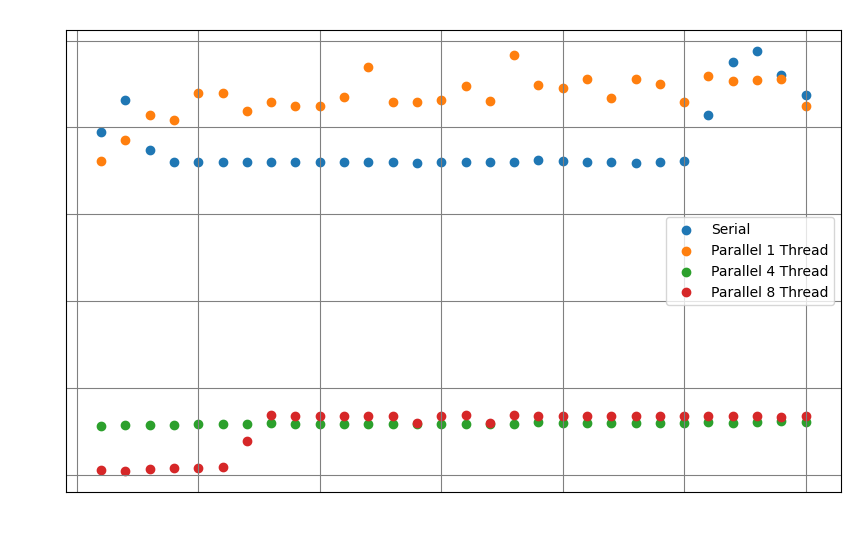

In [65]:
plt.scatter(x, ep_ser, label="Serial")
plt.scatter(x, ep_pp_1, label="Parallel 1 Thread")
plt.scatter(x, ep_pp_4, label="Parallel 4 Thread")
plt.scatter(x, ep_pp_8, label="Parallel 8 Thread")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP C Rust")
plt.show()

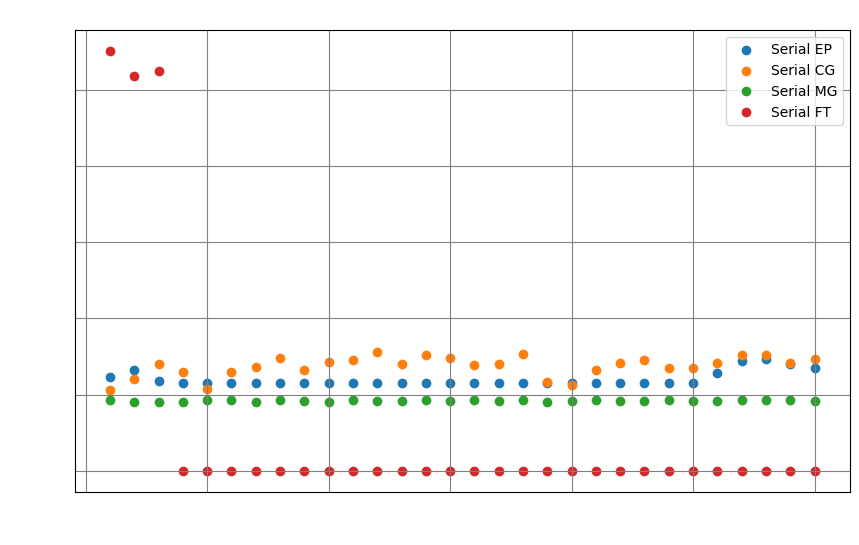

In [18]:
plt.scatter(x, ep_ser, label="Serial EP")
plt.scatter(x, cg, label="Serial CG")
plt.scatter(x, mg, label="Serial MG")
plt.scatter(x, ft, label="Serial FT")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("C Rust")
plt.show()

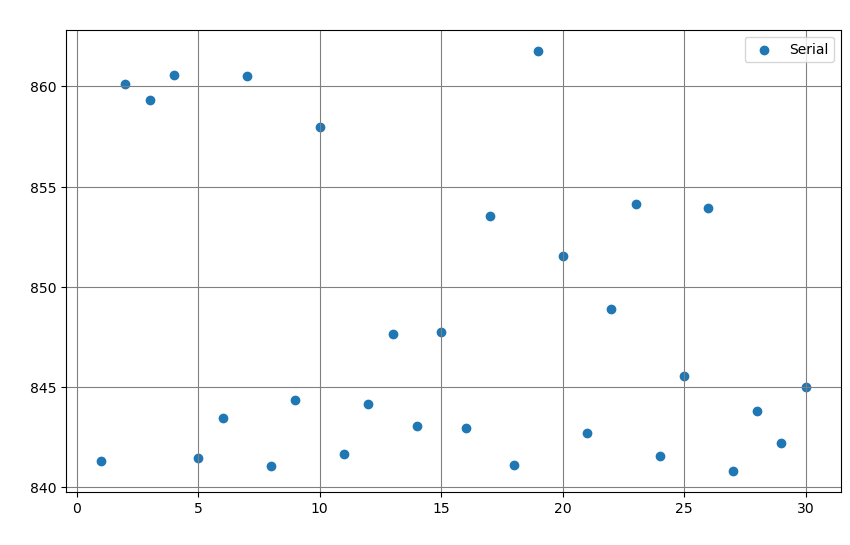

In [19]:
plt.scatter(x, mg, label="Serial")
plt.scatter
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("MG C Rust")
plt.show()

In [ ]:
plt.scatter(x, ep_ser, label="Serial")
plt.scatter(x, ep_pp_1, label="Parallel 1 Thread")
plt.scatter(x, ep_pp_4, label="Parallel 4 Thread")
plt.scatter(x, ep_pp_8, label="Parallel 8 Thread")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP C Rust")
plt.show()

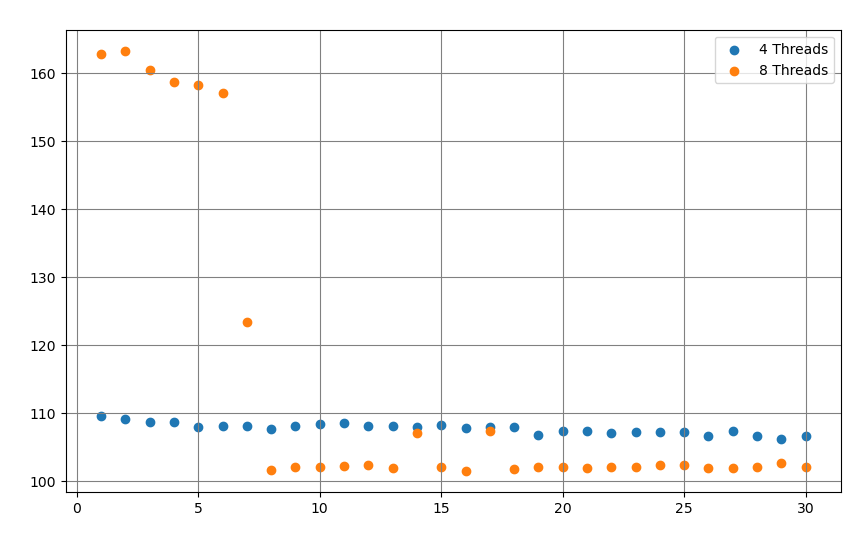

In [17]:
#plt.scatter(x, ep_pp_s_1, label="EP Parallel S 1 Threads")
plt.scatter(x, ep_pp_4, label="4 Threads")
plt.scatter(x, ep_pp_8, label="8 Threads")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP Parallel C Rust")
plt.show()

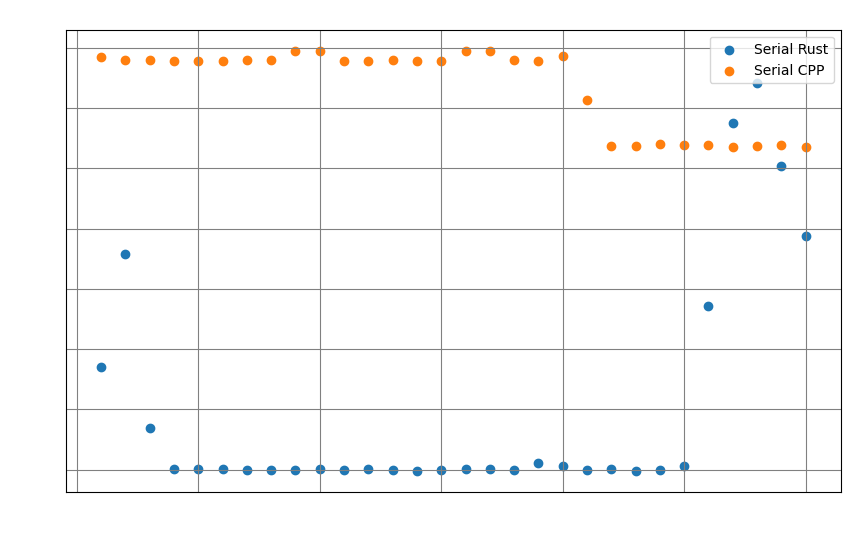

In [24]:
plt.scatter(x, ep_ser, label="Serial Rust")
plt.scatter(x, ep_ser_cpp, label="Serial CPP")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP Serial C")
plt.show()

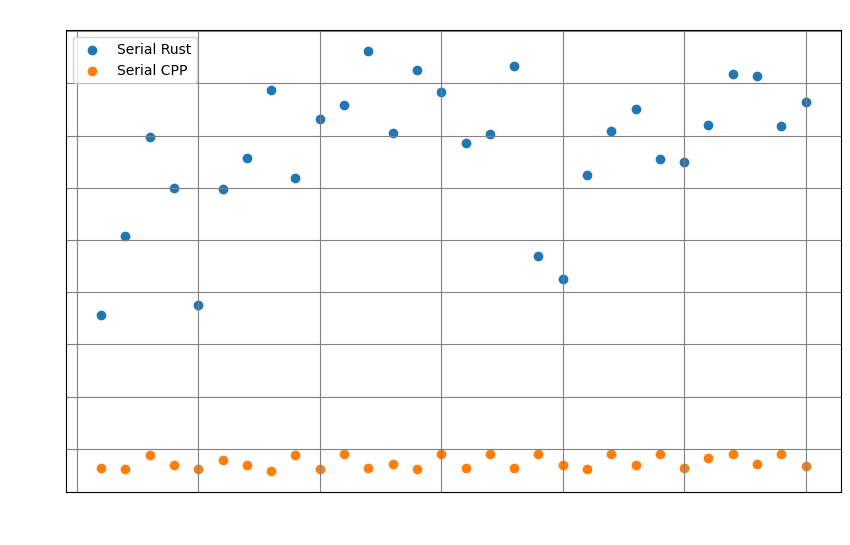

In [21]:
plt.scatter(x, cg, label="Serial Rust")
plt.scatter(x, cg_ser_cpp, label="Serial CPP")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("CG Serial C")
plt.show()

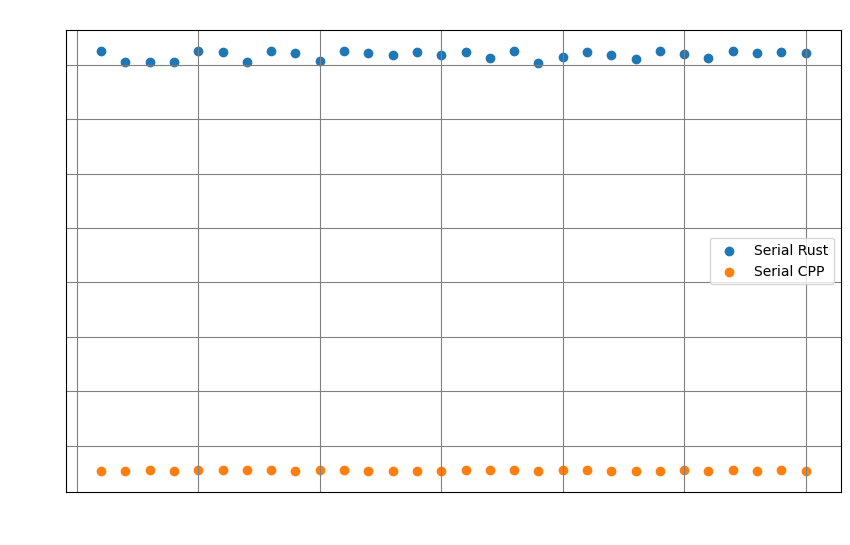

In [22]:
plt.scatter(x, mg, label="Serial Rust")
plt.scatter(x, mg_ser_cpp, label="Serial CPP")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("MG Serial C")
plt.show()

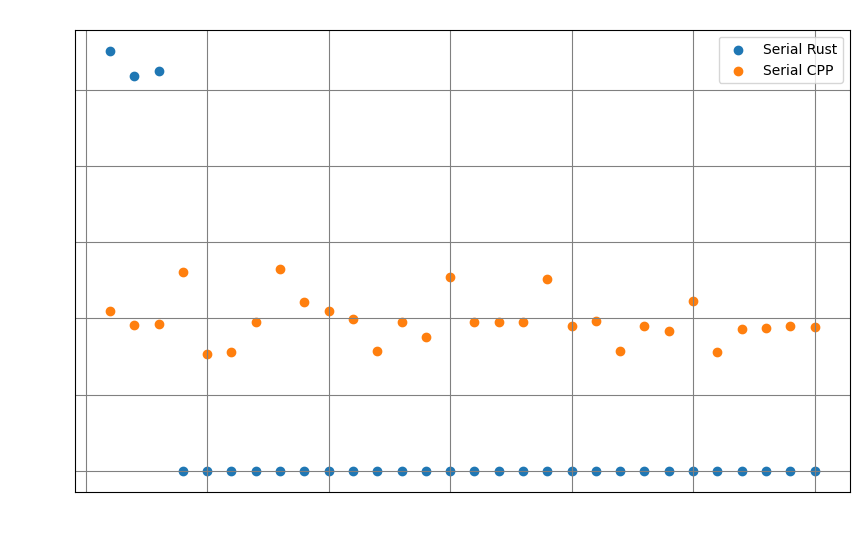

In [23]:
plt.scatter(x, ft, label="Serial Rust")
plt.scatter(x, ft_ser_cpp, label="Serial CPP")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("FT Serial C")
plt.show()

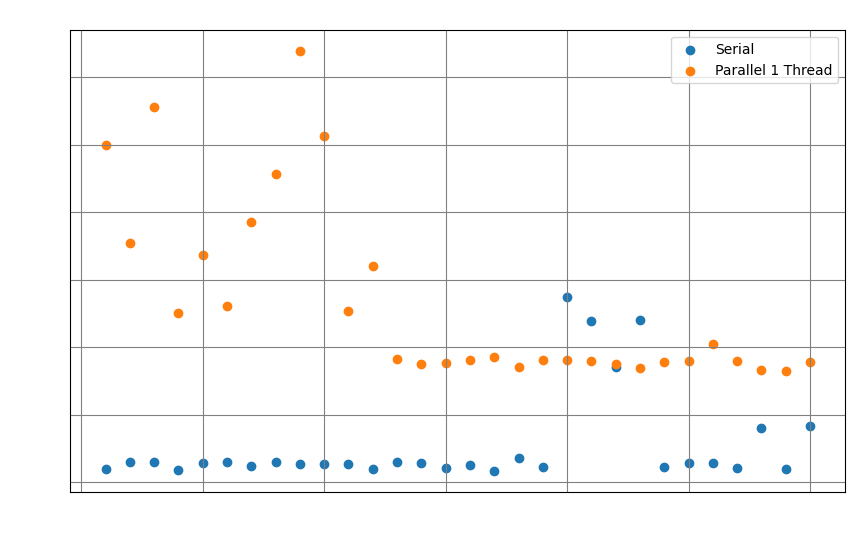

In [164]:
plt.scatter(x, ep_serial_a, label="Serial")
plt.scatter(x, ep_pp_a_1, label="Parallel 1 Thread")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP A Rust")
plt.show()

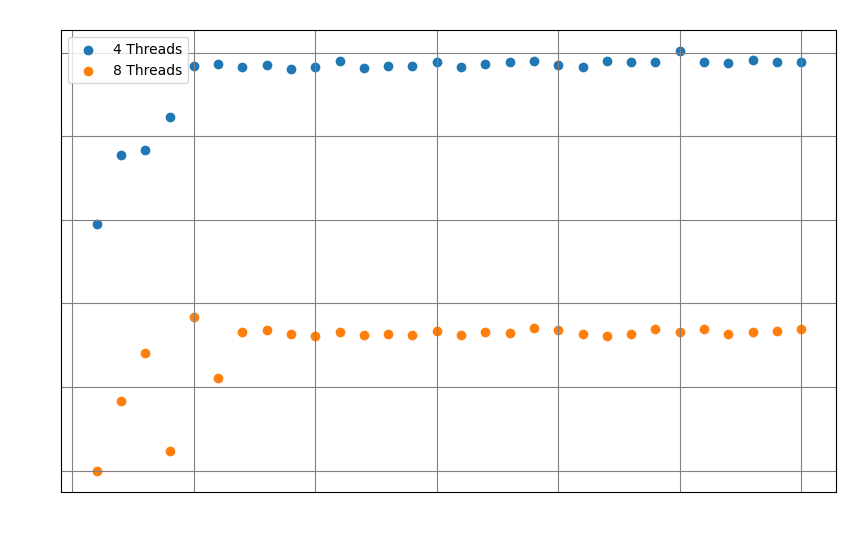

In [165]:
plt.scatter(x, ep_pp_a_4, label="4 Threads")
plt.scatter(x, ep_pp_a_8, label="8 Threads")
plt.xlabel("Executions")
plt.ylabel("Seconds")
plt.legend()
plt.title("EP Parallel A Rust")
plt.show()

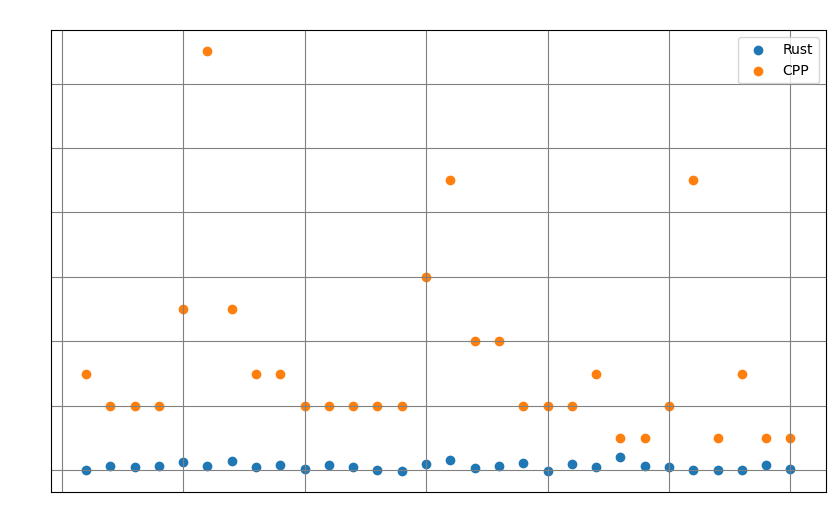

In [272]:
plt.scatter(x, ep_pp_s_8, label="Rust")
plt.scatter(x, ep_pp_s_8_cpp, label="CPP")
plt.legend()
plt.title("EP Parallel S 8 Threads")
#plt.tick_params(axis="x", colors="white")
#plt.tick_params(axis="y", colors="white")
plt.show()

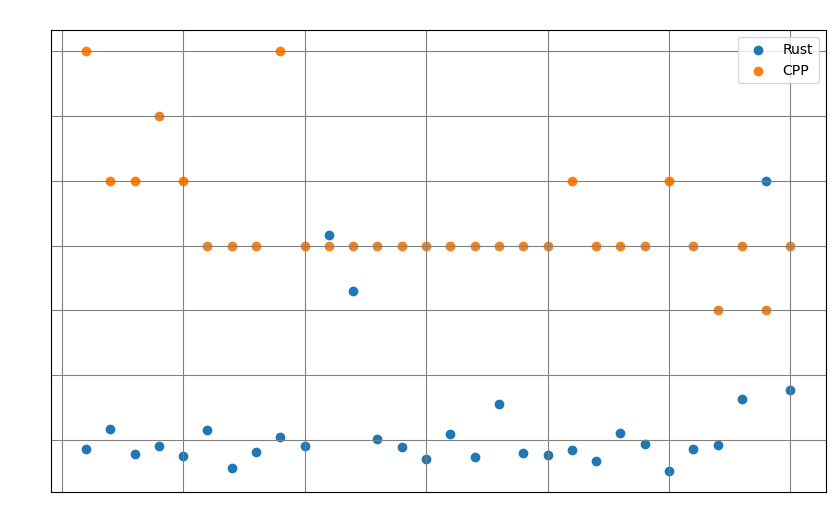

In [274]:
plt.scatter(x, ep_pp_w_8, label="Rust")
plt.scatter(x, ep_pp_w_8_cpp, label="CPP")
plt.legend()
plt.title("EP Parallel W 8 Threads")
#plt.tick_params(axis="x", colors="white")
#plt.tick_params(axis="y", colors="white")
plt.show()

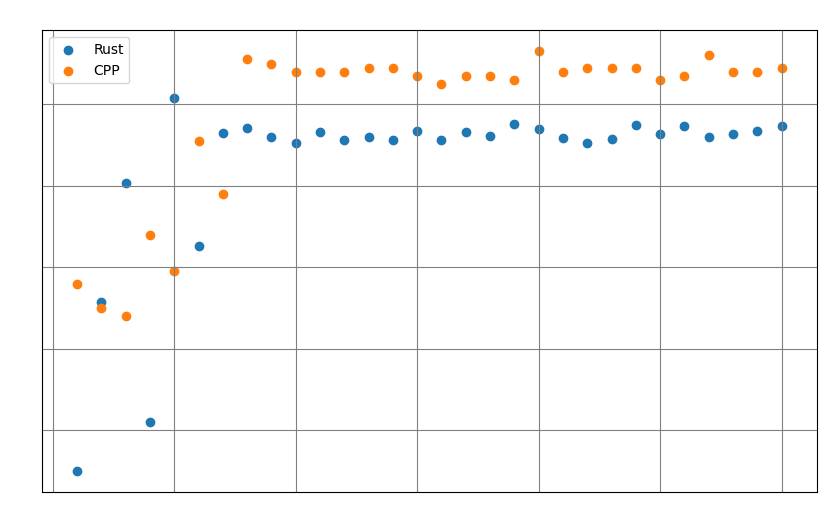

In [275]:
plt.scatter(x, ep_pp_a_8, label="Rust")
plt.scatter(x, ep_pp_a_8_cpp, label="CPP")
plt.legend()
plt.title("EP Parallel A 8 Threads")
plt.show()

<Figure size 600x1000 with 0 Axes>

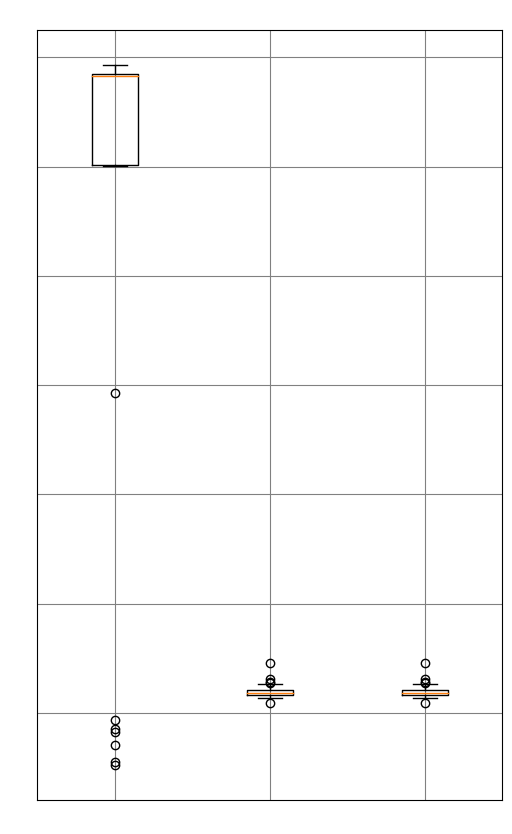

In [26]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_8, ep_pp_cpp_8, ep_pp_fr_8], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel C 8 Threads")
plt.show()

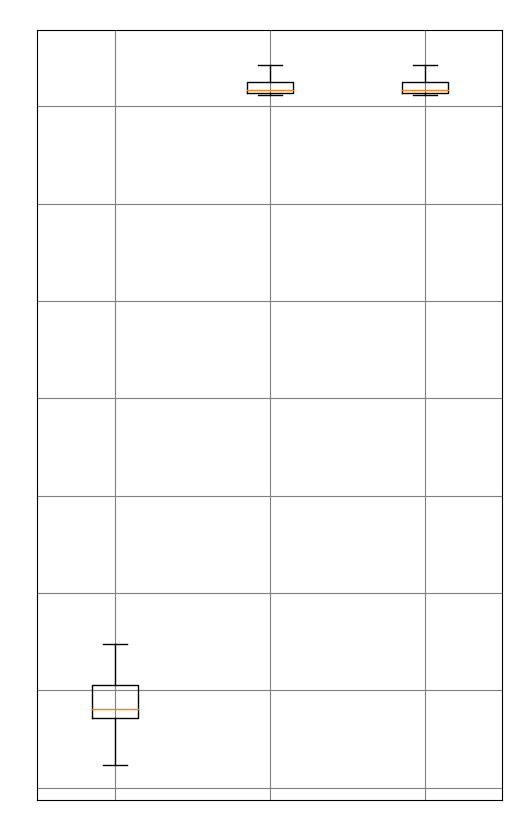

In [27]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_4, ep_pp_cpp_4, ep_pp_fr_4], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel C 4 Threads")
plt.show()

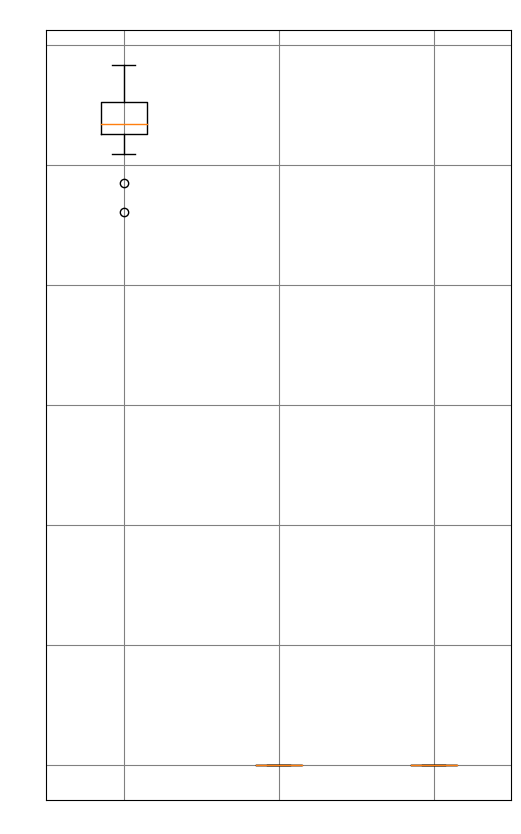

In [28]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_1, ep_pp_cpp_1, ep_pp_fr_1], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel C 1 Threads")
plt.show()

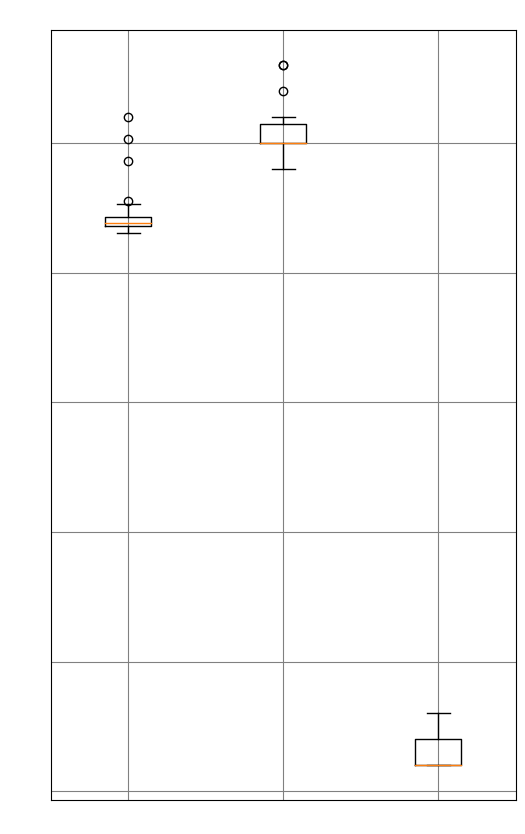

In [260]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_w_8, ep_pp_w_8_cpp, ep_pp_w_8_fortran], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel W 8 Threads")
plt.show()

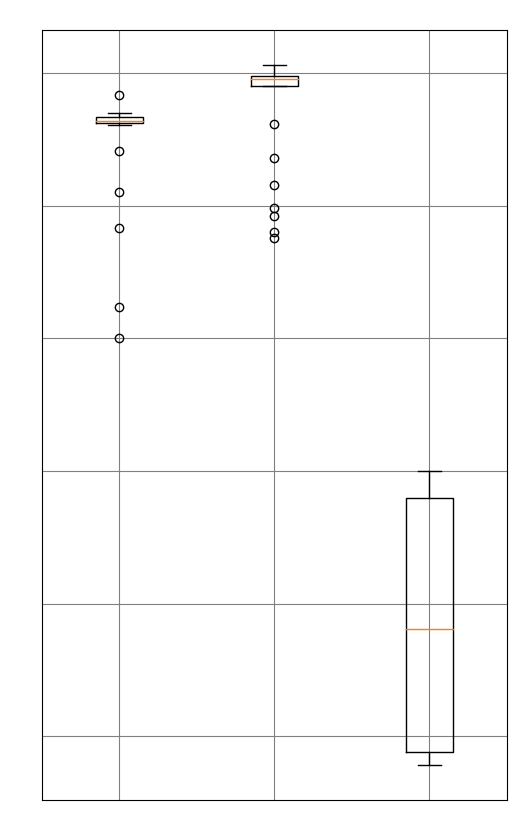

In [262]:
plt.figure(figsize=(6,10))
plt.boxplot([ep_pp_a_8, ep_pp_a_8_cpp, ep_pp_a_8_fortran], labels=["Rust", "CPP", "Fortran"])
plt.title("EP Parallel A 8 Threads")
plt.show()

In [57]:
st.median(ep_pp_s_8)

0.161170374

In [16]:
st.median(ep_pp_s_8_cpp)

0.18

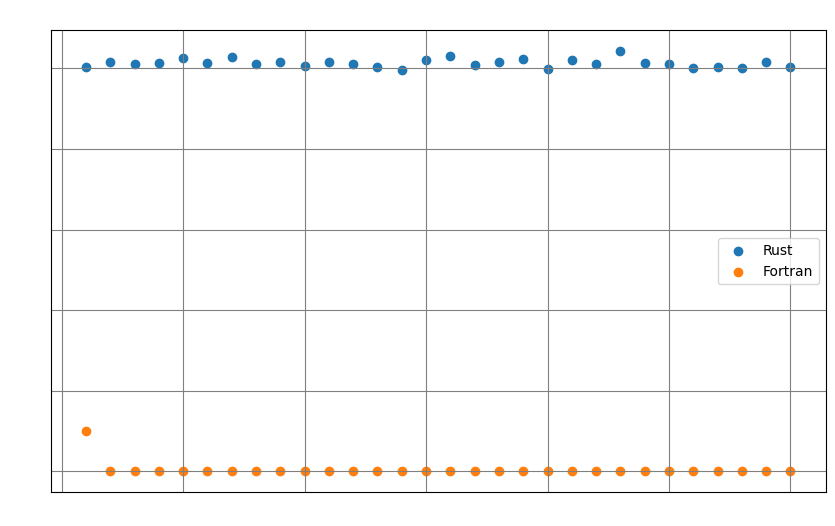

In [268]:
#plt.figure(figsize=(8, 4))
plt.scatter(x, ep_pp_s_8, label="Rust")
plt.scatter(x, ep_pp_s_8_fortran, label="Fortran")
plt.legend()
plt.title("EP Parallel S 8 Threads")
plt.show()

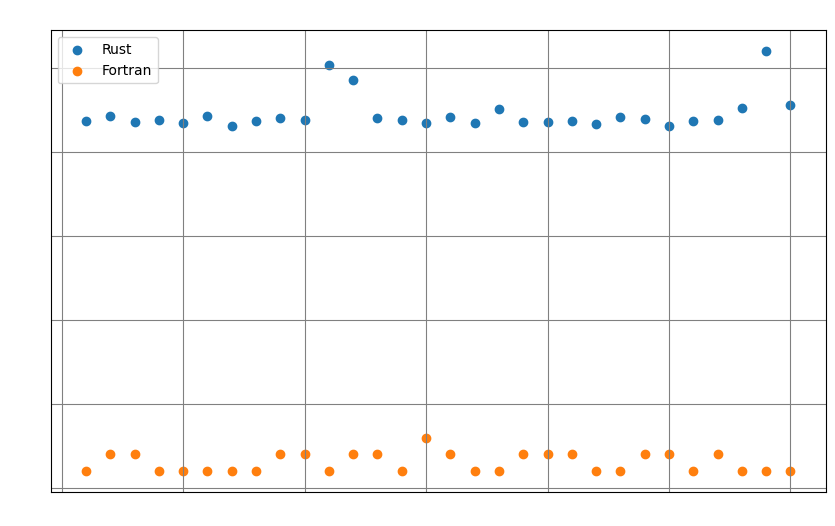

In [269]:
plt.scatter(x, ep_pp_w_8, label="Rust")
plt.scatter(x, ep_pp_w_8_fortran, label="Fortran")
plt.legend()
plt.title("EP Parallel W 8 Threads")
plt.show()

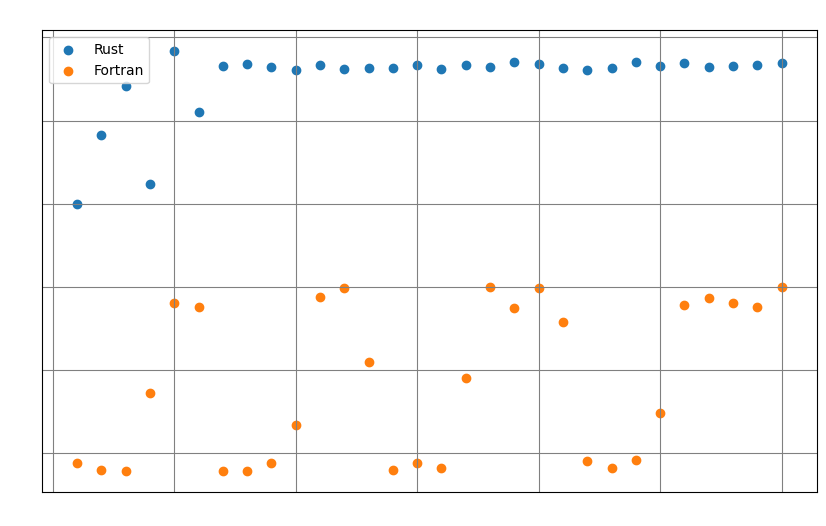

In [270]:
plt.scatter(x, ep_pp_a_8, label="Rust")
plt.scatter(x, ep_pp_a_8_fortran, label="Fortran")
plt.legend()
plt.title("EP Parallel A 8 Threads")
plt.show()

In [22]:
fig, ax = plt.subplots(4,1)
keys = list(results.keys())
values = list(results.values())
colors = ["orange", "blue", "green", "red"]

for i in range(4):
    label_ = keys[i]
    y = values[i]
    
    y_min = min(y)
    y_max = max(y)
    margin = 0.05

    ax[i].plot(x, y, color=colors[i])
    ax[i].set_title(label_)
    ax[i].set_xlabel("Execution")
    ax[i].set_ylabel("Milisseconds")
    ax[i].set_ylim([y_min * (1-margin), y_max * (1+margin)])

plt.subplots_adjust(bottom=15, top=20)
plt.show()

NameError: name 'results' is not defined

In [59]:
plt.boxplot(list(results.values()))
plt.ylabel("Milliseconds")
#plt.ylim([0.0, 2.5])
plt.show()

NameError: name 'results' is not defined

In [29]:
makespan_ep_serial = st.mean(ep_ser)
makespan_ep_pp_1 = st.mean(ep_pp_1)
makespan_ep_pp_4 = st.mean(ep_pp_4)
makespan_ep_pp_8 = st.mean(ep_pp_8)
makespan_cg = st.mean(cg)
makespan_mg = st.mean(mg)
makespan_ft = st.mean(ft)

makespan_ep_ppcpp_1 = st.mean(ep_pp_cpp_1)
makespan_ep_ppcpp_4 = st.mean(ep_pp_cpp_4)
makespan_ep_ppcpp_8 = st.mean(ep_pp_cpp_8)
makespan_ep_cppserial = st.mean(ep_ser_cpp)
makespan_cgcpp = st.mean(cg_ser_cpp)
makespan_mgcpp = st.mean(mg_ser_cpp)
makespan_ftcpp = st.mean(ft_ser_cpp)

makespan_ep_ppft_1 = st.mean(ep_pp_fr_1)
makespan_ep_ppft_4 = st.mean(ep_pp_fr_4)
makespan_ep_ppft_8 = st.mean(ep_pp_fr_8)

In [195]:
print(makespan_serial_s)
print(makespan_parallel_s_1)

0.8933139545
0.9162363865


In [25]:
overhead_ep = makespan_ep_pp_1 - makespan_ep_serial

In [26]:
speed_up_ep_8 = makespan_ep_serial / makespan_ep_pp_8
speed_up_ep_4 = makespan_ep_serial / makespan_ep_pp_4

In [27]:
eficiencia_ep_8 = speed_up_ep_8 / 8
eficiencia_ep_4 = speed_up_ep_4 / 4

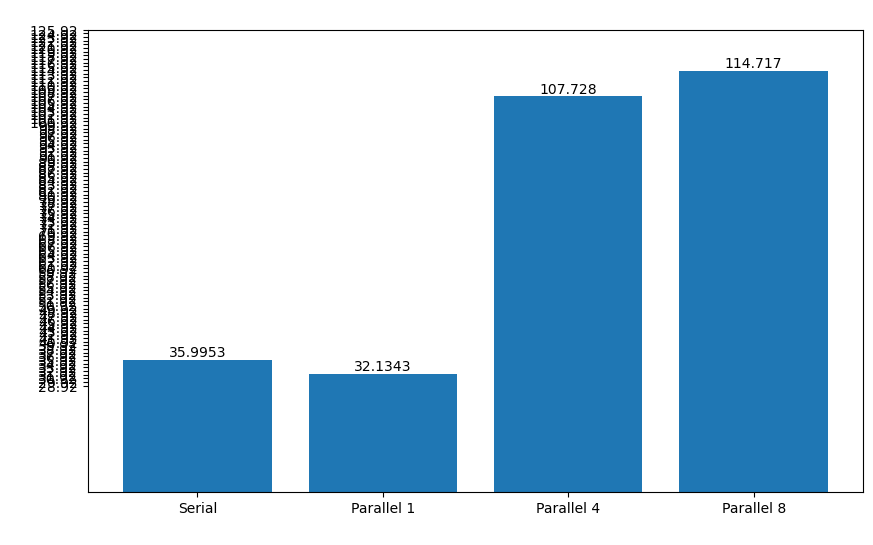

In [32]:
x = ["Serial", "Parallel 1", "Parallel 4", "Parallel 8"]
y = [makespan_ep_serial, makespan_ep_pp_1, makespan_ep_pp_4, makespan_ep_pp_8]
plt.title("Parallel makespan")
fig = plt.bar(x, y)
plt.xlabel("Threads")
plt.ylabel("Seconds")
plt.grid(False)
plt.yticks(np.arange(min(y) * 0.9, max(y) * 1.1, 1))
plt.bar_label(fig, label_type="edge")
plt.show()

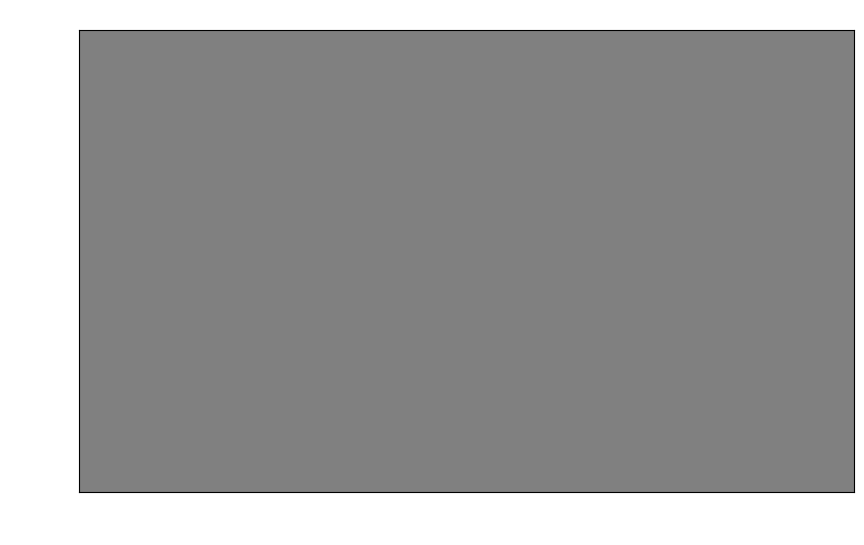

In [30]:
y = [makespan_ep_pp_1, makespan_ep_ppcpp_1, makespan_ep_ppft_1]
plt.title("EP Parallel makespan")
plt.bar(["Rust", "CPP", "Fortran"], y)
plt.xlabel("Threads")
plt.ylabel("Seconds")
plt.yticks(np.arange(min(y) * 0.9, max(y) * 1.1, 0.1))
plt.show()

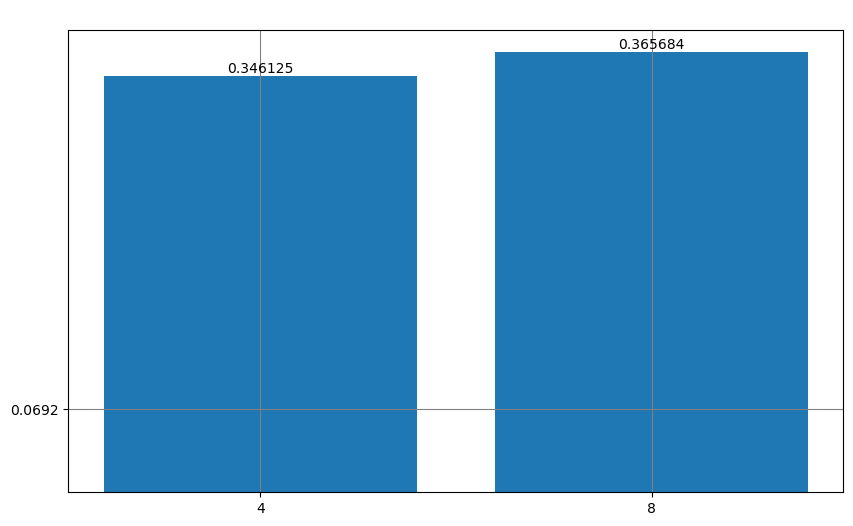

In [35]:
y = [speed_up_ep_4, speed_up_ep_8]
plt.title("Parallel speed-up")
fig = plt.bar(["4","8"], y)
plt.yticks(np.arange(min(y) * 0.2, max(y) * 1.1, 1))
plt.bar_label(fig, label_type="edge")
plt.show()

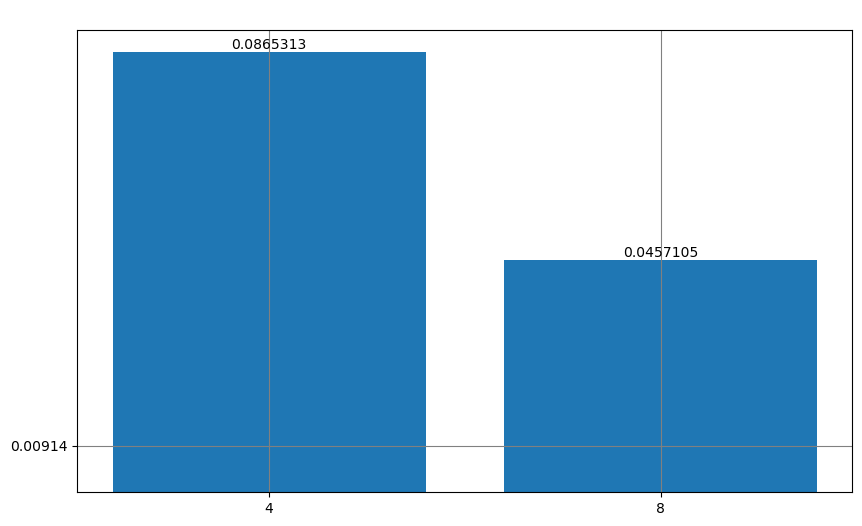

In [36]:
y = [eficiencia_ep_4, eficiencia_ep_8]
plt.title("Parallel eficiency")
fig = plt.bar(["4","8"], y)
plt.yticks(np.arange(min(y) * 0.2, max(y) * 1.1, 0.1))
plt.bar_label(fig, label_type="edge")
plt.show()